## RANDOM FOREST


#### 1. Exploratory Data Analysis (EDA):

Perform exploratory data analysis to understand the structure of the dataset. Check for missing values, outliers, inconsistencies in the data.

#### 2 Data Visualization:


Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

Analyze any patterns or correlations observed in the data.

#### 3 Data Preprocessing :


1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.


2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.


3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.


#### 4 Random Forest Model Implementation :


1. Divide the data into train and test split.

2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.

3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

#### 5  Bagging and Boosting Methods:


Apply the Bagging and Boosting methods and compare the results.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
column_names = ["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Class"]
glass_data = pd.read_csv(url, names=column_names)



   Id       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Class
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0      1
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0      1
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0      1
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0      1
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0      1
Id       0
RI       0
Na       0
Mg       0
Al       0
Si       0
K        0
Ca       0
Ba       0
Fe       0
Class    0
dtype: int64
               Id          RI          Na          Mg          Al          Si  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean   107.500000    1.518365   13.407850    2.684533    1.444907   72.650935   
std     61.920648    0.003037    0.816604    1.442408    0.499270    0.774546   
min      1.000000    1.511150   10.730000    0.000000    0.290000   69.810000   
25%     54.250000    1.516522   12.907500

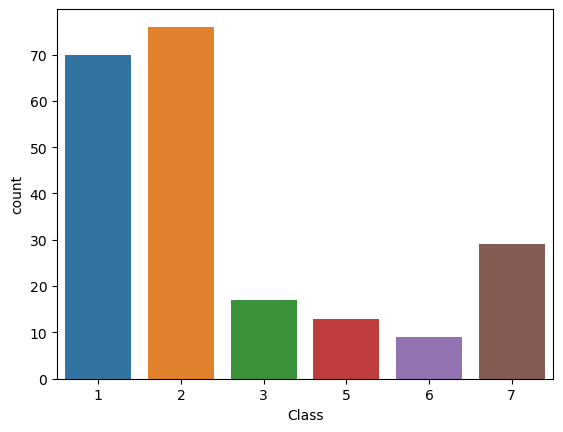

In [2]:
# Display the first few rows of the dataset
print(glass_data.head())

# Check for missing values
print(glass_data.isnull().sum())

# Summary statistics
print(glass_data.describe())

# Visualize the distribution of the target variable 'Class'
sns.countplot(x='Class', data=glass_data)
plt.show()


In [4]:
glass_data.columns

Index(['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class'], dtype='object')

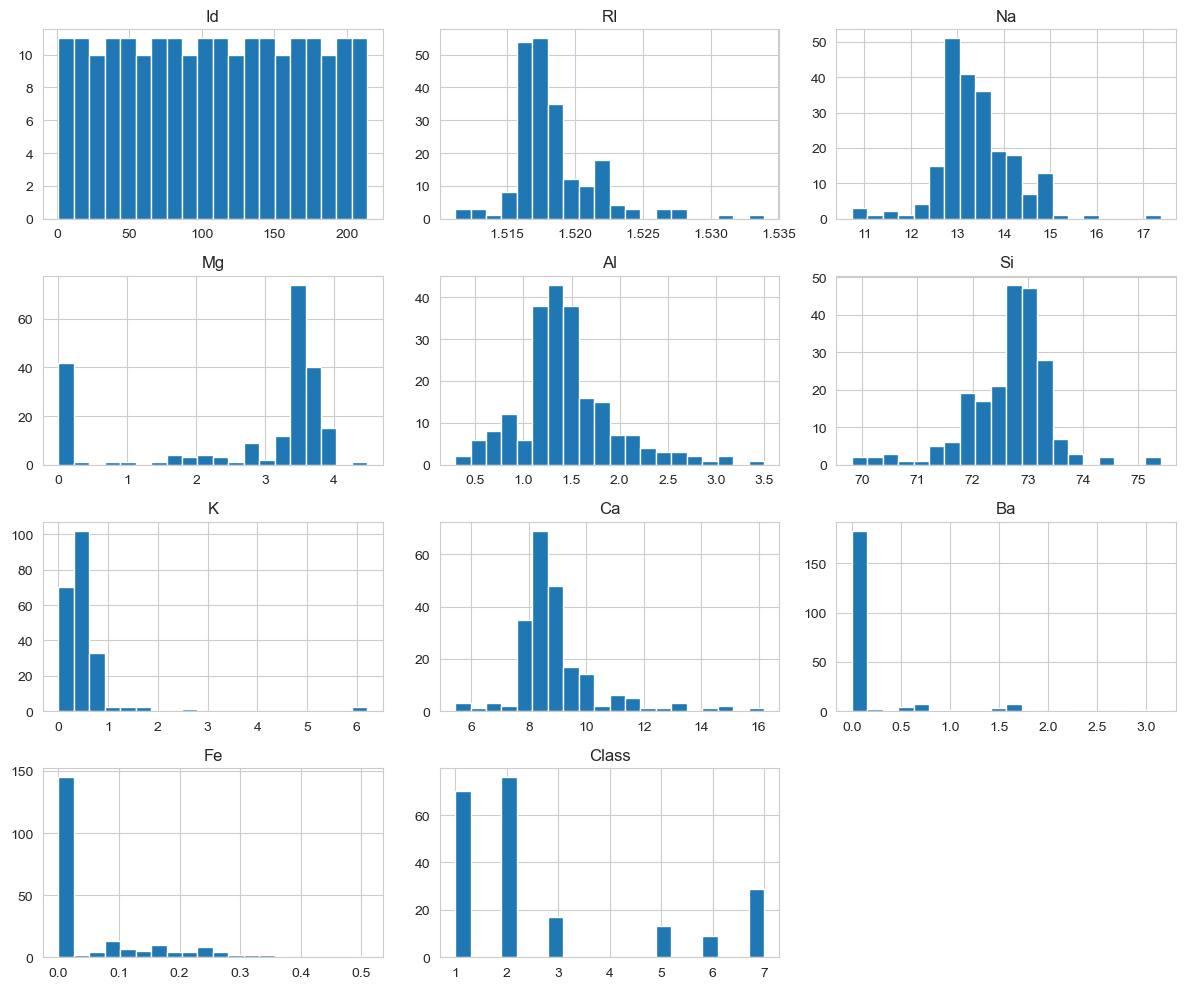

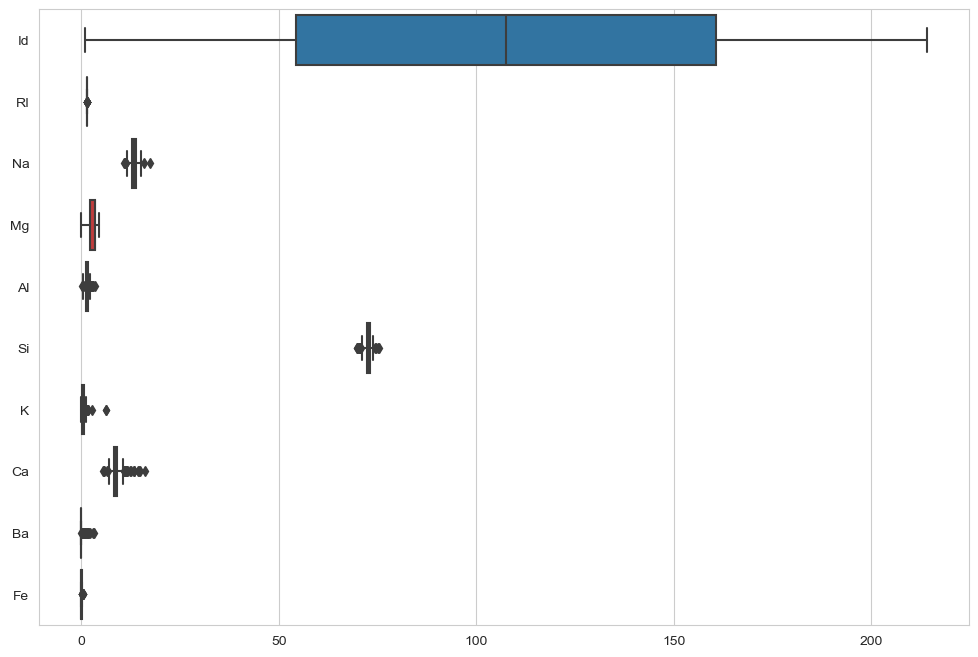

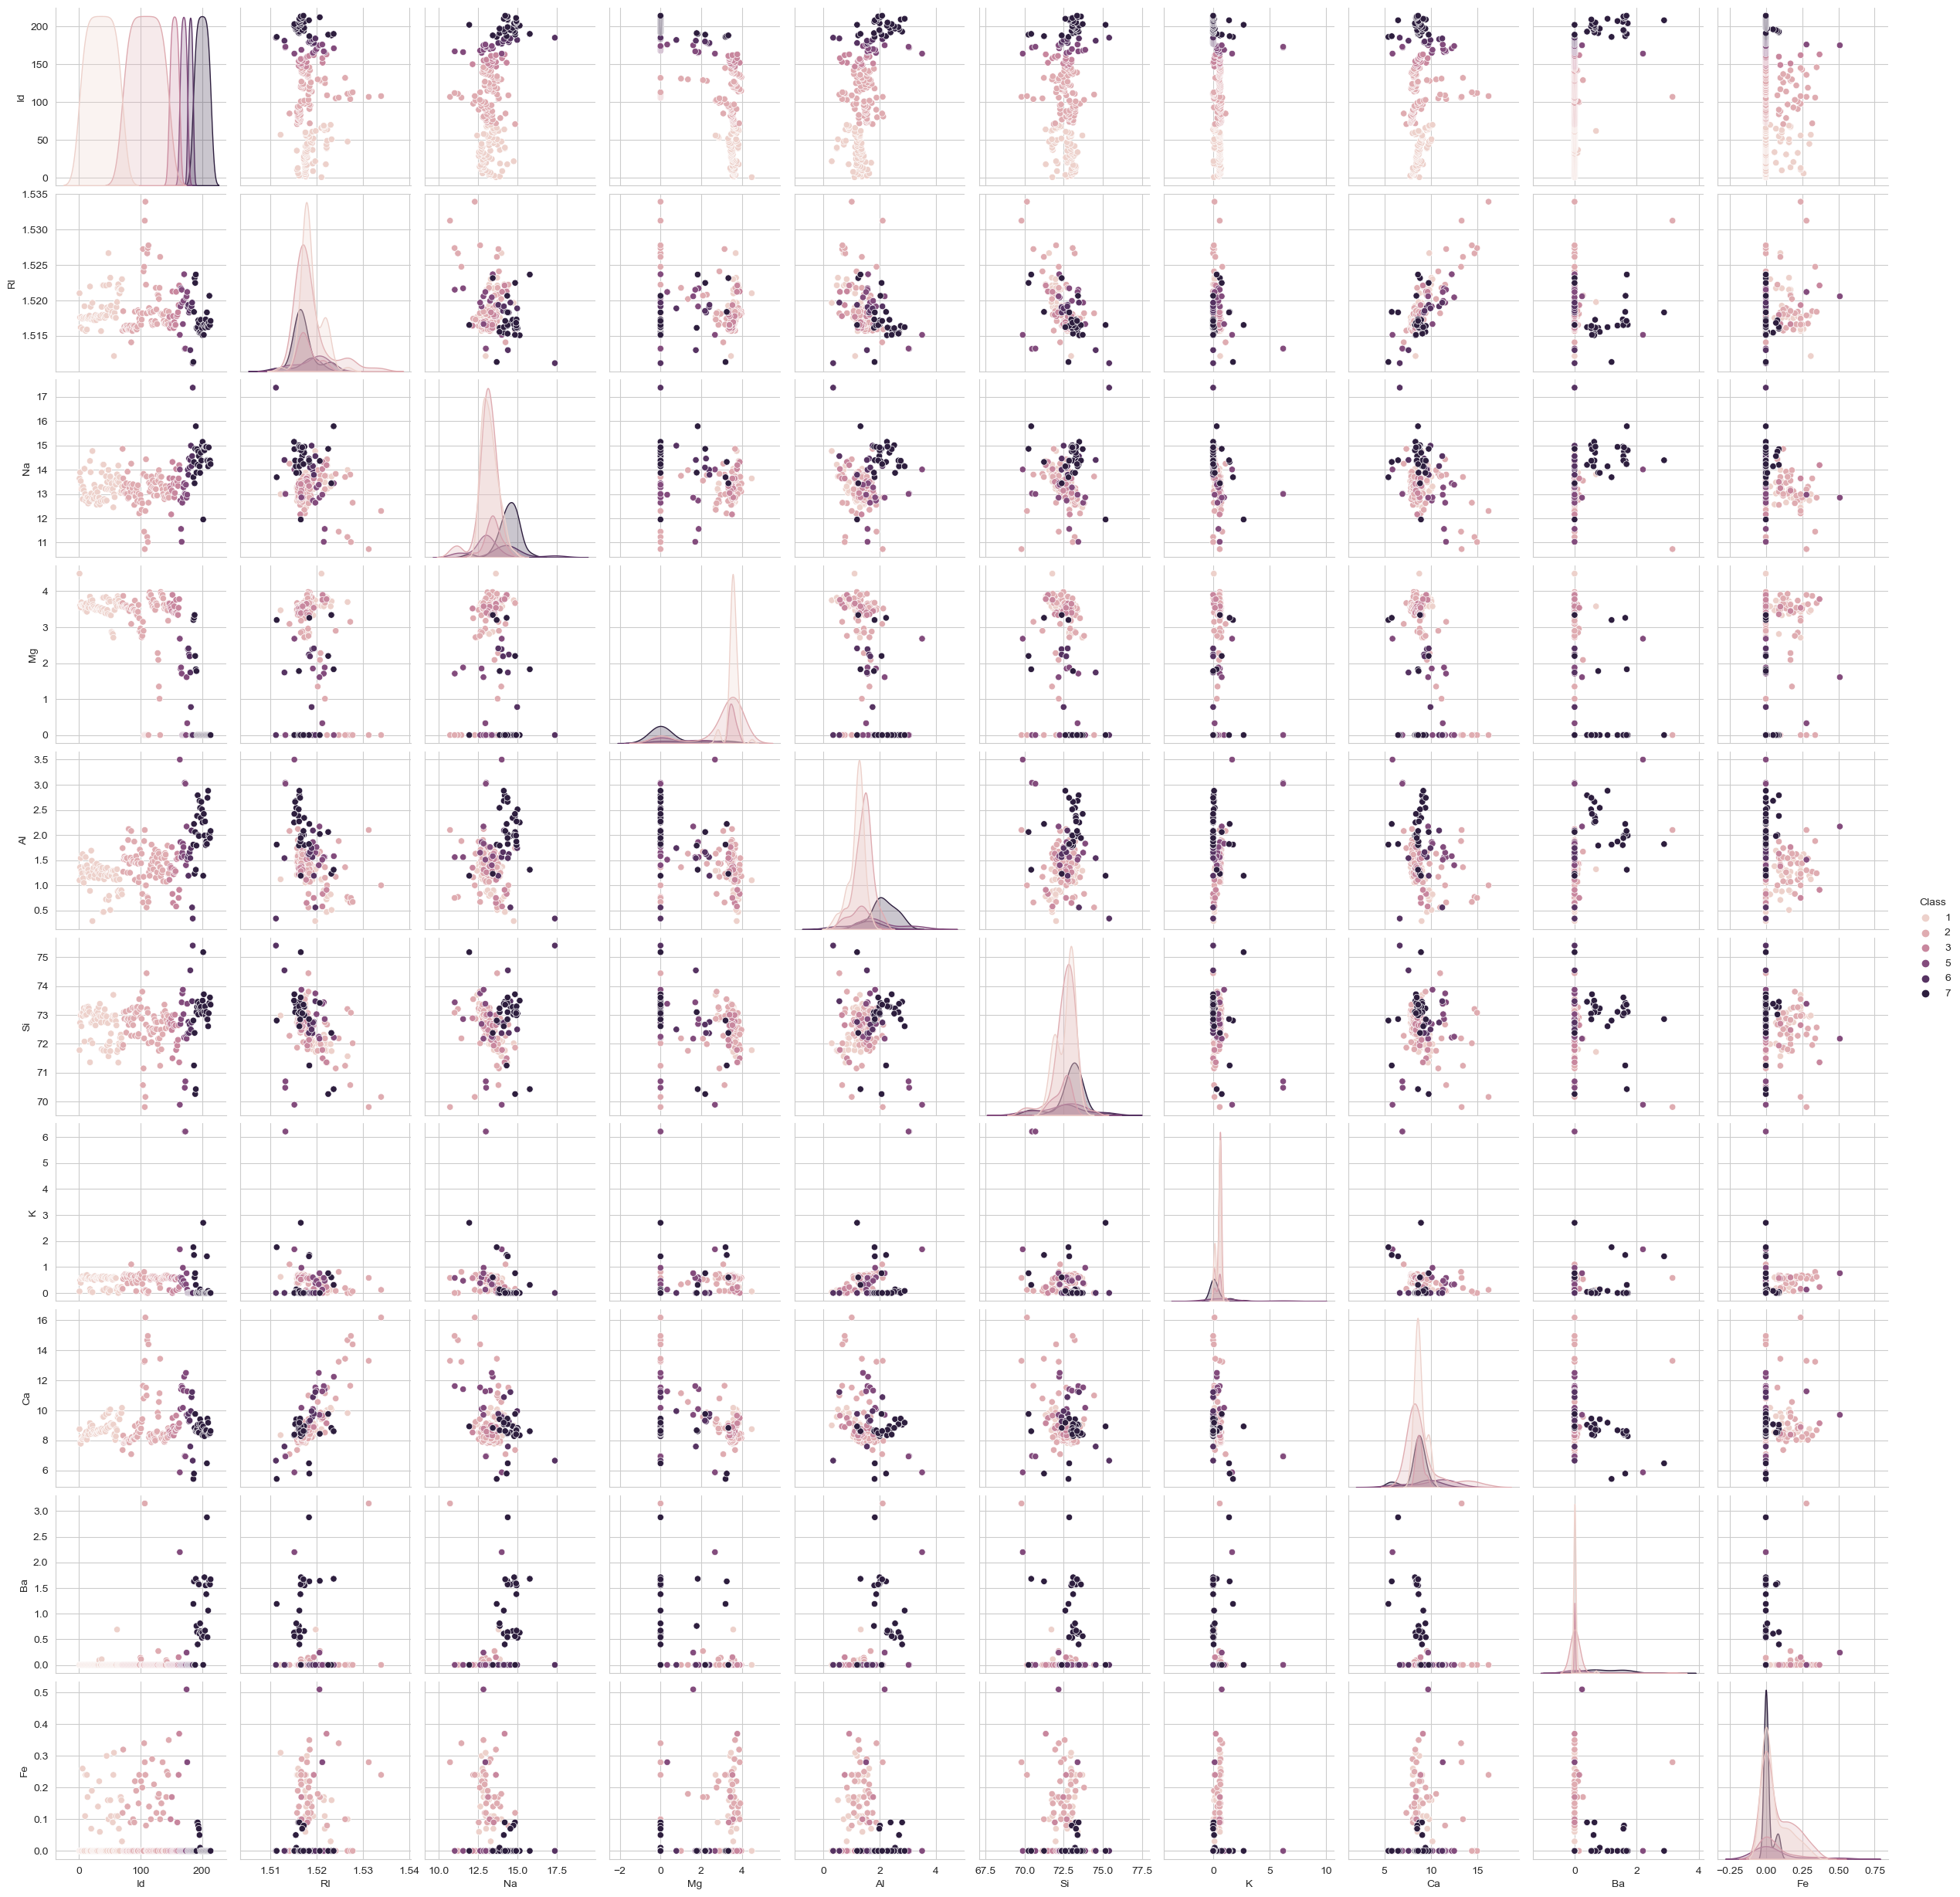

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn plots
sns.set_style("whitegrid")

# Histograms for all numerical features
glass_data.hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

# Box plots for each feature
plt.figure(figsize=(12, 8))
sns.boxplot(data=glass_data.drop('Class', axis=1), orient='h')
plt.show()

# Pair plot to visualize relationships between features
sns.pairplot(glass_data, hue='Class', diag_kind='kde')
plt.show()


In [6]:
missing_values = glass_data.isnull().sum()


In [12]:
import pandas as pd

numerical_columns = glass_data.select_dtypes(include=['int', 'float']).columns

print("Numerical Columns:")
print(numerical_columns)


Numerical Columns:
Index(['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class'], dtype='object')


In [18]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

# Impute missing values with the mean for numerical columns
mean_imputer = SimpleImputer(strategy='mean')
glass_data[Id] = mean_imputer.fit_transform(glass_data[Id])

#Id is Numerical column

NameError: name 'Id' is not defined

In [19]:
import pandas as pd


categorical_columns = glass_data.select_dtypes(include=['object']).columns
print("Categorical columns:")
print(categorical_columns)


Categorical columns:
Index([], dtype='object')


In [21]:
# No Categorical Columns

In [22]:
from sklearn.model_selection import train_test_split

X = glass_data.drop('Class', axis=1)
y = glass_data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [23]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Bagging (Random Forest)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)

# Boosting (AdaBoost)
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
ada_y_pred = ada_model.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_y_pred)

print(f"Random Forest (Bagging) Accuracy: {rf_accuracy}")
print(f"AdaBoost (Boosting) Accuracy: {ada_accuracy}")


C:\Users\prana\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Random Forest (Bagging) Accuracy: 1.0
AdaBoost (Boosting) Accuracy: 0.7674418604651163
